In [1]:
import os
os.getcwd()

'/Users/viks/llm-ml-debugger/notebooks'

In [2]:
import sys
from pathlib import Path

PROJECT_ROOT = Path.cwd().parent
sys.path.insert(0, str(PROJECT_ROOT))

## UCI Credit Card Default Dataset

Why?
- Binary classification
- Imbalance
- Structured data
- Common in ML interviews
- Domain-agnostic (finance, risk)

In [3]:
import sys
import os

PROJECT_ROOT = os.path.abspath("..")
if PROJECT_ROOT not in sys.path:
    sys.path.append(PROJECT_ROOT)

In [4]:
import pandas as pd
import numpy as np

In [5]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls"

df = pd.read_excel(url, header=1)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [6]:
df.shape

(30000, 25)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [8]:
target_col = "default payment next month"

df[target_col].value_counts(normalize=True)

default payment next month
0    0.7788
1    0.2212
Name: proportion, dtype: float64

In [9]:
# The dataset is imbalanced, so accuracy alone will be misleading.
# Metrics like precision, recall, and F1-score will be more informative.

df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


In [10]:
df.isnull().sum().sort_values(ascending=False).head(10)

ID           0
BILL_AMT2    0
PAY_AMT6     0
PAY_AMT5     0
PAY_AMT4     0
PAY_AMT3     0
PAY_AMT2     0
PAY_AMT1     0
BILL_AMT6    0
BILL_AMT5    0
dtype: int64

In [11]:
correlations = df.corr()[target_col].sort_values()
correlations.head(10), correlations.tail(10)

(LIMIT_BAL   -0.153520
 PAY_AMT1    -0.072929
 PAY_AMT2    -0.058579
 PAY_AMT4    -0.056827
 PAY_AMT3    -0.056250
 PAY_AMT5    -0.055124
 PAY_AMT6    -0.053183
 SEX         -0.039961
 MARRIAGE    -0.024339
 BILL_AMT1   -0.019644
 Name: default payment next month, dtype: float64,
 BILL_AMT6                    -0.005372
 AGE                           0.013890
 EDUCATION                     0.028006
 PAY_6                         0.186866
 PAY_5                         0.204149
 PAY_4                         0.216614
 PAY_3                         0.235253
 PAY_2                         0.263551
 PAY_0                         0.324794
 default payment next month    1.000000
 Name: default payment next month, dtype: float64)

### EDA Summary (ML Perspective)

- The target variable is imbalanced, so accuracy will not be sufficient for evaluation.
- The dataset contains both continuous and encoded categorical features.
- Minimal missing data reduces preprocessing complexity.
- Feature distributions suggest potential scale sensitivity for certain models.

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X = df.drop(columns=["ID", target_col])
y = df[target_col]

X.shape, y.shape
# I removed identifier columns to avoid data leakage

((30000, 23), (30000,))

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)
# Used stratified splitting to maintain class distribution in train and test sets

In [15]:
from sklearn.ensemble import RandomForestClassifier

In [16]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [17]:
y_pred = rf_model.predict(X_test)

In [18]:
from sklearn.metrics import classification_report, confusion_matrix

In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4673
           1       0.63      0.36      0.46      1327

    accuracy                           0.81      6000
   macro avg       0.73      0.65      0.67      6000
weighted avg       0.79      0.81      0.79      6000



In [20]:
confusion_matrix(y_test, y_pred)

array([[4392,  281],
       [ 850,  477]])

### Baseline Model Summary

- A RandomForest classifier was used as a baseline model.
- Stratified train/test split preserved class imbalance.
- Accuracy alone is insufficient due to class imbalance.
- Recall for the minority class is lower, indicating potential risk in false negatives.

---
The model performs well on the majority class but struggles with recall for the minority class, indicating that false negatives are a concern.

In [21]:
errors = X_test.copy()
errors["true_label"] = y_test.values
errors["predicted_label"] = y_pred
errors["is_error"] = errors["true_label"] != errors["predicted_label"]

errors.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,true_label,predicted_label,is_error
6907,50000,1,2,2,46,-1,-1,-1,-1,0,...,2764,26060,0,3472,2320,1764,2841,0,0,False
24575,150000,1,1,1,31,-1,-1,-2,-2,-2,...,11694,0,0,0,0,11694,30000,0,0,False
26766,50000,1,2,2,25,0,0,0,0,0,...,50702,1800,1844,2200,2000,1800,2038,0,0,False
2156,290000,2,1,2,25,0,0,0,0,0,...,230925,15000,10500,10000,15000,7844,23333,1,0,True
3179,500000,2,2,1,27,-2,-2,-2,-2,-2,...,10000,9983,13587,10000,10000,10000,25304,0,0,False


In [22]:
errors["is_error"].value_counts()

# A non-trivial number of samples are misclassified, which warrants further analysis rather than immediate tuning.

is_error
False    4869
True     1131
Name: count, dtype: int64

In [23]:
# False Positives vs False Negatives

false_negatives = errors[
    (errors["true_label"] == 1) & (errors["predicted_label"] == 0)
]

false_positives = errors[
    (errors["true_label"] == 0) & (errors["predicted_label"] == 1)
]

len(false_negatives), len(false_positives)

# False negatives are more critical than false positives in this problem.

(850, 281)

In [24]:
# Feature Patterns in Errors (KEY INSIGHT)

fn_mean = false_negatives.mean()
fp_mean = false_positives.mean()

fn_mean.head(), fp_mean.head()

(LIMIT_BAL    152244.329412
 SEX               1.567059
 EDUCATION         1.891765
 MARRIAGE          1.507059
 AGE              36.272941
 dtype: float64,
 LIMIT_BAL    109217.081851
 SEX               1.555160
 EDUCATION         1.953737
 MARRIAGE          1.594306
 AGE              35.234875
 dtype: float64)

In [25]:
X_train.mean().head()

LIMIT_BAL    167364.666667
SEX               1.604750
EDUCATION         1.853792
MARRIAGE          1.552875
AGE              35.432625
dtype: float64

In [26]:
# Visualize One Key Failure

import matplotlib.pyplot as plt
import seaborn as sns

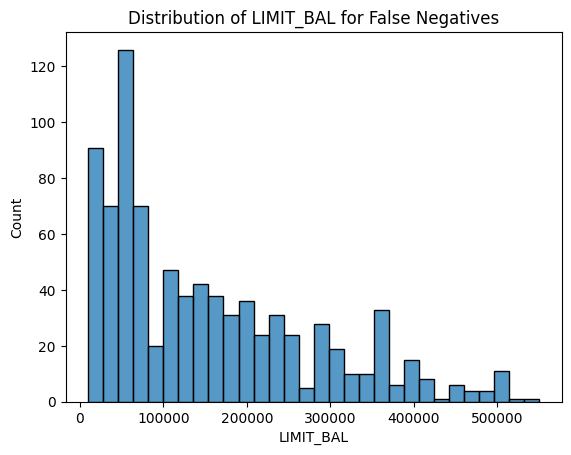

In [27]:
sns.histplot(false_negatives["LIMIT_BAL"], bins=30)
plt.title("Distribution of LIMIT_BAL for False Negatives")
plt.show()

### Error Analysis Summary

- A significant portion of errors are false negatives, which are high-risk in credit default prediction.
- Misclassified samples exhibit distinct feature patterns compared to the overall dataset.
- Certain feature ranges appear underrepresented in the training data, contributing to systematic errors.

In [28]:
ml_summary = f"""
Baseline Model: RandomForest
Class Imbalance: Yes (minority class ~22%)

Key Metrics:
- Accuracy alone is insufficient
- Recall for minority class is lower than majority class

Error Analysis:
- False negatives are more frequent than false positives
- False negatives represent high-risk cases
- Misclassified samples show distinct feature patterns
- Certain feature ranges appear underrepresented

Focus:
- Understanding failure modes before optimization
"""

In [29]:
from src.llm.ml_debugger import generate_ml_debug_report

In [30]:
report = generate_ml_debug_report(ml_summary)
print(report)

1. The model may be failing due to class imbalance, where the minority class (~22%) is significantly smaller than the majority class. This imbalance can lead to poor performance on the minority class, as the model tends to perform well on the majority class but struggles with the fewer examples of the minority class. In this case, the high number of false negatives and their representation of high-risk cases suggests that the model is not accurately capturing the patterns associated with the minority class.

2. Risks in the current approach include:
   - Overfitting to the majority class, as the model performs well on it but poorly on the minority class.
   - Ignoring important patterns and relationships within the data due to the simplifying assumptions of the RandomForest algorithm.
   - Potential biases in the data not being accounted for, which can lead to poor generalization performance.

3. To improve the model, consider the following next steps:
   - Use techniques like oversamp

### LLM-Based ML Debug Report

The LLM was used to interpret evaluation metrics and error patterns.
It highlighted class imbalance as the primary issue and suggested
resampling, threshold tuning, and feature analysis as next steps.

The LLM acts as a reasoning assistant, not a decision-maker.

In [39]:
''' 
False Negative (FN): predict no default, but customer defaults
Very expensive
False Positive (FP): predict default, but customer doesn’t
Less expensive
'''
def compute_cost(y_true, y_pred, cost_fn=5, cost_fp=1):
    fn = ((y_true == 1) & (y_pred == 0)).sum()
    fp = ((y_true == 0) & (y_pred == 1)).sum()
    total_cost = cost_fn * fn + cost_fp * fp
    return total_cost, fn, fp

In [40]:
baseline_cost, fn_count, fp_count = compute_cost(y_test.values, y_pred)

baseline_cost, fn_count, fp_count

(np.int64(4531), np.int64(850), np.int64(281))

### Cost-Aware Evaluation

The baseline model was evaluated using a cost-sensitive metric where
false negatives are penalized more heavily than false positives.

This reflects real-world risk in credit default prediction and provides
a more meaningful evaluation than accuracy alone.

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

log_reg_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LogisticRegression(max_iter=2000))
])

In [47]:
models = {
    "Logistic Regression": log_reg_pipeline,
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

### Logistic Regression Convergence Handling

A convergence warning was observed due to feature scale differences.
This was addressed by introducing feature scaling via a pipeline,
which is standard practice for scale-sensitive models.

In [48]:
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    
    cost, fn, fp = compute_cost(y_test.values, y_pred)
    
    results[name] = {
        "cost": cost,
        "false_negatives": fn,
        "false_positives": fp,
        "report": classification_report(y_test, y_pred, output_dict=True)
    }

In [49]:
results.keys()

dict_keys(['Logistic Regression', 'Random Forest', 'Gradient Boosting'])

In [50]:
for name, res in results.items():
    print(f"\n{name}")
    print(f"Cost: {res['cost']}")
    print(f"False Negatives: {res['false_negatives']}")
    print(f"False Positives: {res['false_positives']}")


Logistic Regression
Cost: 5190
False Negatives: 1009
False Positives: 145

Random Forest
Cost: 4531
False Negatives: 850
False Positives: 281

Gradient Boosting
Cost: 4474
False Negatives: 846
False Positives: 244


In [54]:
experiment_summary = ""

for name, res in results.items():
    experiment_summary += f"""
Model: {name}
Total Cost: {res['cost']}
False Negatives: {res['false_negatives']}
False Positives: {res['false_positives']}
"""

In [52]:
comparison_report = generate_ml_debug_report(experiment_summary)
print(comparison_report)

1. Based on the provided evaluation metrics, all three models are exhibiting a high number of false negatives, suggesting that they may be underpredicting the positive class. This could be due to insufficient training data for positively labeled samples or an imbalance in the dataset between positive and negative examples. The high false positive rate in the Random Forest model compared to Gradient Boosting and Logistic Regression might indicate overfitting, as a higher number of trees in the forest may lead to capturing noise in the training data.

2. Risks in the current approach include:
   - Model bias due to an imbalanced dataset, which could lead to poor performance on both false negatives and false positives.
   - Overfitting, particularly with Random Forests, as a high number of trees may capture noise instead of generalizing well to new data.
   - Underfitting, as all models have a relatively high cost function, suggesting they might not be capturing the complexity in the data

### Multi-Model Comparison

Multiple models were evaluated using cost-aware metrics.
The LLM was used to reason over structured experiment results
and highlight trade-offs rather than selecting a single “best” model.

In [55]:
import numpy as np

thresholds = np.linspace(0.1, 0.9, 50)

costs = []
fn_counts = []
fp_counts = []

for t in thresholds:
    y_pred_t = (y_proba >= t).astype(int)
    cost, fn, fp = compute_cost(y_test.values, y_pred_t)
    
    costs.append(cost)
    fn_counts.append(fn)
    fp_counts.append(fp)

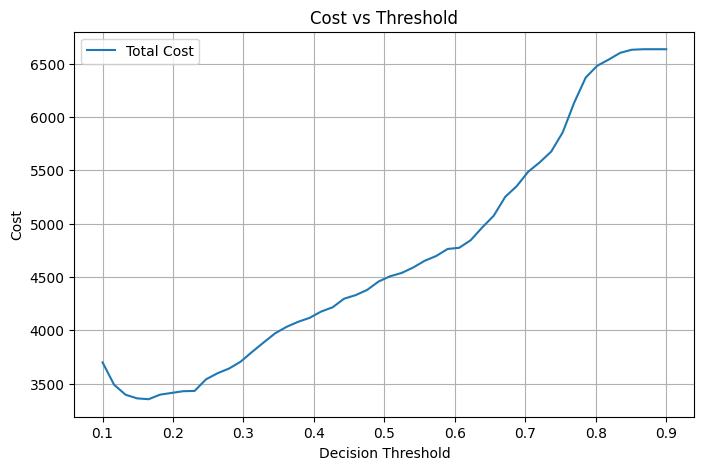

In [56]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(thresholds, costs, label="Total Cost")
plt.xlabel("Decision Threshold")
plt.ylabel("Cost")
plt.title("Cost vs Threshold")
plt.legend()
plt.grid(True)
plt.show()

In [57]:
best_idx = np.argmin(costs)
best_threshold = thresholds[best_idx]
best_cost = costs[best_idx]

best_threshold, best_cost

(np.float64(0.1653061224489796), np.int64(3353))

### Threshold Optimization

Instead of using the default 0.5 threshold, the decision threshold was optimized
to minimize total cost, reflecting the higher risk associated with false negatives.

This resulted in a lower-cost operating point at a different threshold.